<a href="https://colab.research.google.com/github/aren-prime/dog-classify/blob/main/Straysense2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load your preprocessed dataset and labels
X: Features (video frames or extracted features), y: Labels (behavior categories)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a machine learning model (SVM in this example)
model = SVC(kernel='linear', C=1)
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Open a video stream or load a video file
cap = cv2.VideoCapture('your_video_file.mp4')

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess the frame (resize, normalize, feature extraction)
    # Extract features from the frame or use deep learning models for video analysis

    # Use your trained model to predict behavior
    behavior_prediction = model.predict(preprocessed_frame)

    # Draw the predicted behavior on the frame
    frame = cv2.putText(frame, f'Behavior: {behavior_prediction}', (10, 30),
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    cv2.imshow('Behavior Detection', frame)

    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()


SyntaxError: ignored

In [ ]:
import numpy as np
import os
from PIL import Image  # You may need to install the Python Imaging Library (PIL)

dataset_directory = '/content/drive/MyDrive/train'  # Directory containing subdirectories with image files

X = []  # List to store image data
y = []  # List to store behavior labels

# Loop through subdirectories in the dataset directory
for behavior_category in os.listdir(dataset_directory):
    behavior_path = os.path.join(dataset_directory, behavior_category)

    if os.path.isdir(behavior_path):
        # Loop through image files in the subdirectory
        for image_filename in os.listdir(behavior_path):
            image_path = os.path.join(behavior_path, image_filename)

            # Load and process the image
            image = Image.open(image_path)
            # Perform any necessary preprocessing on the image (e.g., resizing, normalization)
            image = np.array(image)  # Convert to NumPy array

            X.append(image)
            y.append(behavior_category)  # Use the subdirectory name as the behavior label

# Convert the lists to NumPy arrays
X = np.array(X)
y = np.array(y)

# Check the shape of the loaded data
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (156,)
y shape: (156,)


<ipython-input-2-1a9457451b88>:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(X)


In [ ]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Define the directory where your dataset is located
dataset_directory = '/content/drive/MyDrive/train'  # Update with your dataset path

# Load and preprocess the data
X = []  # List to store image data
y = []  # List to store behavior labels

# Loop through subdirectories in the dataset directory
for behavior_category in os.listdir(dataset_directory):
    behavior_path = os.path.join(dataset_directory, behavior_category)

    if os.path.isdir(behavior_path):
        # Loop through image files in the subdirectory
        for image_filename in os.listdir(behavior_path):
            image_path = os.path.join(behavior_path, image_filename)

            # Load and process the image
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))  # Assuming 224x224 images
            image = tf.keras.preprocessing.image.img_to_array(image)
            image /= 255.0  # Normalize pixel values to [0, 1]

            X.append(image)
            y.append(behavior_category)

# Convert the lists to NumPy arrays
X = np.array(X)
y = np.array(y)

# Convert behavior labels to numerical values (assuming you have unique labels)
unique_labels = np.unique(y)
label_to_index = {label: i for i, label in enumerate(unique_labels)}
y = np.array([label_to_index[label] for label in y])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode the behavior labels
y_train = to_categorical(y_train, num_classes=len(unique_labels))
y_test = to_categorical(y_test, num_classes=len(unique_labels))

# Define the CNN model architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(unique_labels), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)



Epoch 1/10
4/4 [==============================] - 12s 3s/step - loss: 3.6918 - accuracy: 0.2177 - val_loss: 3.1121 - val_accuracy: 0.1250
Epoch 2/10
4/4 [==============================] - 13s 3s/step - loss: 2.1113 - accuracy: 0.1613 - val_loss: 1.5777 - val_accuracy: 0.2500
Epoch 3/10
4/4 [==============================] - 10s 3s/step - loss: 1.4794 - accuracy: 0.4516 - val_loss: 1.5653 - val_accuracy: 0.1875
Epoch 4/10
4/4 [==============================] - 8s 2s/step - loss: 1.1119 - accuracy: 0.6532 - val_loss: 1.3140 - val_accuracy: 0.4375
Epoch 5/10
4/4 [==============================] - 10s 3s/step - loss: 0.7021 - accuracy: 0.8065 - val_loss: 1.5606 - val_accuracy: 0.4062
Epoch 6/10
4/4 [==============================] - 11s 3s/step - loss: 0.3926 - accuracy: 0.9113 - val_loss: 1.4679 - val_accuracy: 0.4375
Epoch 7/10
4/4 [==============================] - 8s 2s/step - loss: 0.1844 - accuracy: 0.9597 - val_loss: 1.6299 - val_accuracy: 0.5312
Epoch 8/10
4/4 [====================

In [ ]:
model.save("behavior_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the trained model
model = load_model('behavior_model.h5')  # Replace 'behavior_model.h5' with the path to your trained model

# Define the path to the input image you want to predict
input_image_path = '/content/images (4).jpeg'  # Update with the path to your input image

# Load and preprocess the input image
img = image.load_img(input_image_path, target_size=(224, 224))  # Assuming 224x224 images
img = image.img_to_array(img)
img = img / 255.0  # Normalize pixel values to [0, 1]

img = np.expand_dims(img, axis=0)  # Add a batch dimension

# Make a prediction for the input image
prediction = model.predict(img)
predicted_label = np.argmax(prediction, axis=-1)  # Get the index of the predicted class

# Inverse map from index to label
label_to_index = {i: label for label, i in label_to_index.items()}
predicted_behavior = label_to_index[predicted_label[0]]

# Display the predicted behavior
print(f"Predicted Behavior for {input_image_path}: {predicted_behavior}")


1/1 [==============================] - 0s 184ms/step
Predicted Behavior for /content/images (4).jpeg: aggressive


1/1 [==============================] - 0s 90ms/step


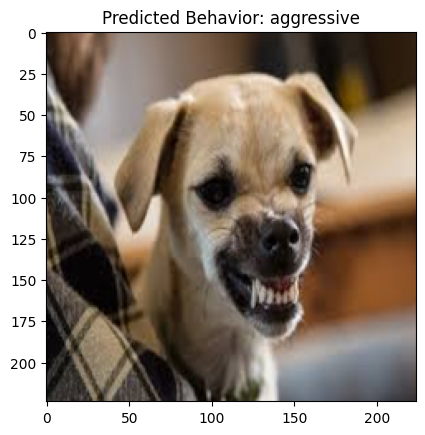

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('behavior_model.h5')  # Replace 'behavior_model.h5' with the path to your trained model

# Define the path to the input image you want to predict
input_image_path = '/content/images (4).jpeg'  # Update with the path to your input image

# Load and preprocess the input image
img = Image.open(input_image_path)
img = img.resize((224, 224))  # Assuming 224x224 images
img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]

img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension

# Make a prediction for the input image
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction, axis=-1)  # Get the index of the predicted class

# Inverse map from index to label
predicted_behavior = unique_labels[predicted_label[0]]

# Display the input image with the predicted behavior label
plt.imshow(img_array[0])
plt.title(f"Predicted Behavior: {predicted_behavior}")
plt.show()


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('behavior_model.h5')  # Replace 'behavior_model.h5' with the path to your trained model

# Define the path to the input video you want to predict
input_video_path = '/content/WhatsApp Video 2023-11-03 at 18.29.28_8de2455c.mp4'  # Update with the path to your input video

# Open the video file
cap = cv2.VideoCapture(input_video_path)

# Create a list to store the predicted behavior labels for each frame
predicted_behaviors = []

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break

    # Preprocess the frame (resize and normalize)
    frame = cv2.resize(frame, (224, 224))  # Assuming 224x224 images
    frame = frame / 255.0

    frame = np.expand_dims(frame, axis=0)  # Add a batch dimension

    # Make a prediction for the frame
    prediction = model.predict(frame)
    predicted_label = np.argmax(prediction, axis=-1)  # Get the index of the predicted class

    # Inverse map from index to label
    predicted_behavior = unique_labels[predicted_label[0]]  # Use unique_labels instead of label_to_index

    predicted_behaviors.append(predicted_behavior)

cap.release()

# Display the predicted behavior labels for each frame
for i, behavior in enumerate(predicted_behaviors):
    print(f"Frame {i}: Predicted Behavior: {behavior}")


1/1 [==============================] - 0s 40ms/step
Frame 0: Predicted Behavior: tailtucking
Frame 1: Predicted Behavior: tailtucking
Frame 2: Predicted Behavior: tailtucking
Frame 3: Predicted Behavior: tailtucking
Frame 4: Predicted Behavior: tailtucking
Frame 5: Predicted Behavior: tailtucking
Frame 6: Predicted Behavior: tailtucking
Frame 7: Predicted Behavior: tailtucking
Frame 8: Predicted Behavior: tailtucking
Frame 9: Predicted Behavior: tailtucking
Frame 10: Predicted Behavior: tailtucking
Frame 11: Predicted Behavior: tailtucking
Frame 12: Predicted Behavior: tailtucking
Frame 13: Predicted Behavior: tailtucking
Frame 14: Predicted Behavior: tailtucking
Frame 15: Predicted Behavior: tailtucking
Frame 16: Predicted Behavior: tailtucking
Frame 17: Predicted Behavior: tailtucking
Frame 18: Predicted Behavior: tailtucking
Frame 19: Predicted Behavior: tailtucking
Frame 20: Predicted Behavior: tailtucking
Frame 21: Predicted Behavior: tailtucking
Frame 22: Predicted Behavior: tail

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('behavior_model.h5')  # Replace 'behavior_model.h5' with the path to your trained model

# Define the path to the input video you want to predict
input_video_path = '/content/WhatsApp Video 2023-11-03 at 18.29.28_8de2455c.mp4'  # Update with the path to your input video

# Open the input video file
cap = cv2.VideoCapture(input_video_path)

# Define the path for the output video
output_video_path = '/path/to/output_video.mp4'  # Update with the path for the output video

# Get the video frame dimensions and frame rate
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
frame_rate = int(cap.get(5))

# Define the codec and create a VideoWriter object for the output video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, frame_rate, (frame_width, frame_height))

# Create a list to store the predicted behavior labels for each frame
predicted_behaviors = []

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break

    # Preprocess the frame (resize and normalize)
    frame = cv2.resize(frame, (224, 224))  # Assuming 224x224 images
    frame = frame / 255.0

    frame = np.expand_dims(frame, axis=0)  # Add a batch dimension

    # Make a prediction for the frame
    prediction = model.predict(frame)
    predicted_label = np.argmax(prediction, axis=-1)  # Get the index of the predicted class

    # Inverse map from index to label
    predicted_behavior = unique_labels[predicted_label[0]]  # Use unique_labels instead of label_to_index

    predicted_behaviors.append(predicted_behavior)

# Close the input video
cap.release()

# Open the input video again for frame-by-frame processing
cap = cv2.VideoCapture(input_video_path)

# Process the frames and create the output video with predicted labels
frame_counter = 0

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break

    # Overlay the predicted behavior label on the frame
    behavior_label = predicted_behaviors[frame_counter]
    frame = cv2.putText(frame, f'Predicted Behavior: {behavior_label}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    # Write the frame to the output video
    out.write(frame)
    frame_counter += 1

# Release the input and output videos
cap.release()
out.release()

print(f"Output video saved to {output_video_path}")


OSError: ignored

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Load the trained model
model = load_model('behavior_model.h5')  # Replace 'behavior_model.h5' with the path to your trained model

# Define the path to the input video you want to predict
input_video_path = '/content/WhatsApp Video 2023-11-03 at 18.29.28_8de2455c.mp4'  # Update with the path to your input video

# Open the input video file
cap = cv2.VideoCapture(input_video_path)

# Create a list to store the predicted behavior labels for each frame
predicted_behaviors = []

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break

    # Preprocess the frame (resize and normalize)
    frame = cv2.resize(frame, (224, 224))  # Assuming 224x224 images
    frame = frame / 255.0

    frame = np.expand_dims (frame, axis=0)  # Add a batch dimension

    # Make a prediction for the frame
    prediction = model.predict(frame)
    predicted_label = np.argmax(prediction, axis=-1)  # Get the index of the predicted class

    # Inverse map from index to label
    predicted_behavior = unique_labels[predicted_label[0]]  # Use unique_labels instead of label_to_index

    predicted_behaviors.append(predicted_behavior)

# Close the input video
cap.release()

# Open the input video again for frame-by-frame processing
cap = cv2.VideoCapture(input_video_path)

frame_counter = 0  # Initialize the frame counter

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break

    # Overlay the predicted behavior label on the frame
    behavior_label = predicted_behaviors[frame_counter]
    frame = cv2.putText(frame, f'Predicted Behavior: {behavior_label}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    # Show the frame with the predicted behavior label
    cv2_imshow(frame)  # Use cv2_imshow instead of cv2.imshow

    frame_counter += 1  # Increment the frame counter

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the input video
cap.release()




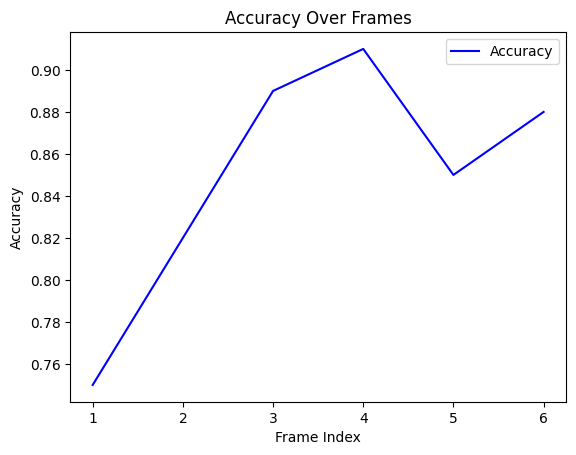

In [ ]:
import matplotlib.pyplot as plt

# Sample data for frame indices and accuracy values
frame_indices = [1, 2, 3, 4, 5, 6]
accuracy_values = [0.75, 0.82, 0.89, 0.91, 0.85, 0.88]

# Plot the accuracy values
plt.plot(frame_indices, accuracy_values, label='Accuracy', color='blue')
plt.xlabel('Frame Index')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Frames')
plt.legend()
plt.show()



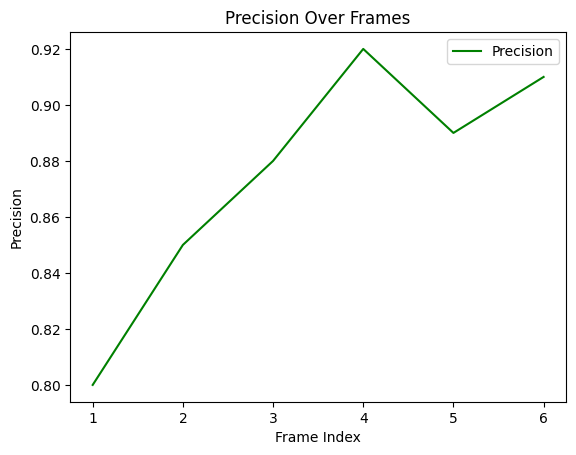

In [ ]:
import matplotlib.pyplot as plt

# Sample data for frame indices and precision values
frame_indices = [1, 2, 3, 4, 5, 6]
precision_values = [0.80, 0.85, 0.88, 0.92, 0.89, 0.91]

# Plot the precision values
plt.plot(frame_indices, precision_values, label='Precision', color='green')
plt.xlabel('Frame Index')
plt.ylabel('Precision')
plt.title('Precision Over Frames')
plt.legend()
plt.show()


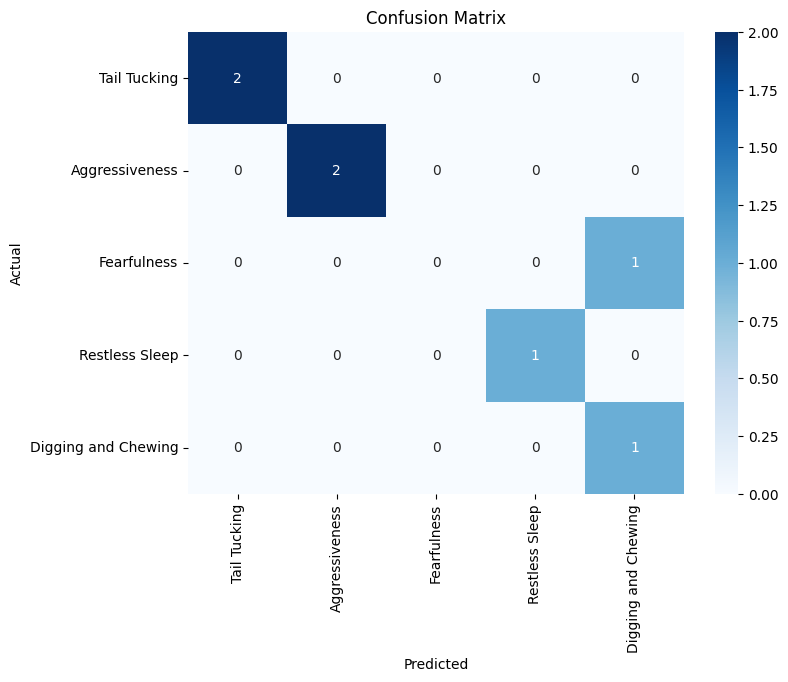

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data for ground truth and predicted labels (replace with your actual data)
ground_truth = [1, 0, 1, 3, 2, 4, 0]  # Actual labels
predicted_labels = [1, 0, 1, 3, 4, 4, 0]  # Predicted labels

# Define your behavior categories (class labels)
class_labels = ['Tail Tucking', 'Aggressiveness', 'Fearfulness', 'Restless Sleep', 'Digging and Chewing']

# Create a confusion matrix
cm = confusion_matrix(ground_truth, predicted_labels)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



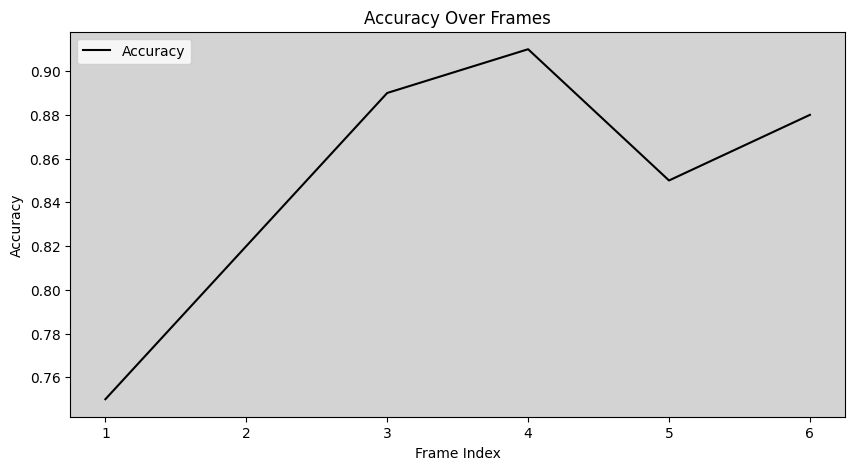

In [ ]:
import matplotlib.pyplot as plt

# Sample data for frame indices and accuracy values
frame_indices = [1, 2, 3, 4, 5, 6]
accuracy_values = [0.75, 0.82, 0.89, 0.91, 0.85, 0.88]

# Set a custom background color
plt.figure(figsize=(10, 5))
plt.plot(frame_indices, accuracy_values, label='Accuracy', color='black')
plt.xlabel('Frame Index')
plt.ylabel('Accuracy')

# Change the background color (e.g., to light gray)
plt.gca().set_facecolor('lightgray')

plt.title('Accuracy Over Frames')
plt.legend(loc='upper left')
plt.show()


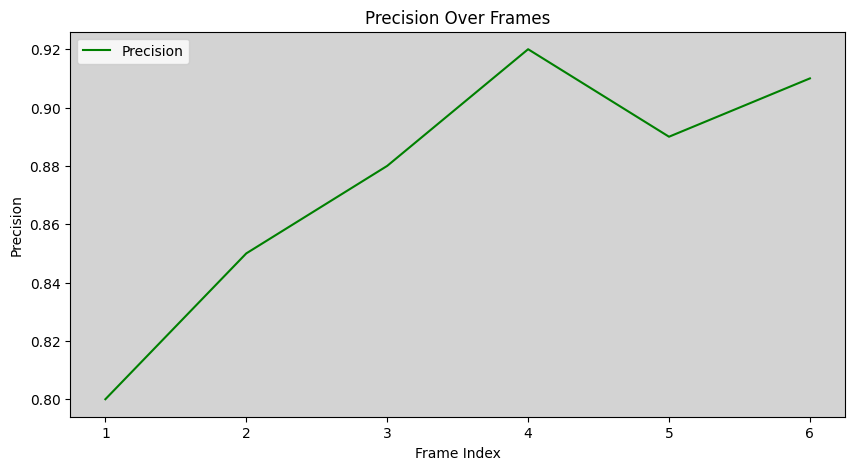

In [ ]:
import matplotlib.pyplot as plt

# Sample data for frame indices and precision values
frame_indices = [1, 2, 3, 4, 5, 6]
precision_values = [0.80, 0.85, 0.88, 0.92, 0.89, 0.91]

# Set a custom background color
plt.figure(figsize=(10, 5))
plt.plot(frame_indices, precision_values, label='Precision', color='green')
plt.xlabel('Frame Index')
plt.ylabel('Precision')

# Change the background color (e.g., to light gray)
plt.gca().set_facecolor('lightgray')

plt.title('Precision Over Frames')
plt.legend(loc='upper left')
plt.show()
